In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df_all = pd.read_csv("video_transcripts.csv")
df_removed = pd.read_csv("filtered_numeric_data.csv")



In [6]:
df_removed.info()
print(df_removed.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51213 entries, 0 to 51212
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   video_id                 51213 non-null  object 
 1   duration                 51213 non-null  float64
 2   comment                  51213 non-null  float64
 3   sponsored                51213 non-null  bool   
 4   likes_to_views           51191 non-null  float64
 5   title_len                51213 non-null  float64
 6   description_len          51213 non-null  float64
 7   avg_engagement_last_20   51211 non-null  float64
 8   fre_title                51213 non-null  float64
 9   fre_description          51213 non-null  float64
 10  hours_since_last_upload  51184 non-null  float64
 11  avg_like_count           51213 non-null  float64
 12  comment_len              51213 non-null  float64
 13  fre_comment              51213 non-null  float64
 14  vader_comment         

In [34]:
df_all['transcript_length'] = np.log(df_all['transcript'].str.len())
# df_all['transcript_length'] = df_all['transcript'].str.len()

df_all.head()

,video_id,transcript,language,is_generated,timestamp,error_reason,transcript_length
0,2HjctXU6N5I,many of you have probably heard the saying tha...,en,True,2025-03-26 09:59:53.366000,NaN,9.523836
1,Yp-hUcvXnes,as we inch closer to the home stretch to seaso...,en,True,2025-03-26 10:13:41.186366,NaN,9.900383
2,N5-AMeWwxqg,Hey guys. We'll be reviewing a concept that we...,en,False,2025-03-26 10:13:42.011849,NaN,9.102310
3,-OzarB6x0q4,yasuo is one of the most loved and hated champ...,en,True,2025-03-26 10:13:42.685904,NaN,9.349493
4,2v3C7y5xu84,let's break down faker's best AR play of all t...,en,True,2025-03-26 10:13:43.372154,NaN,7.124478


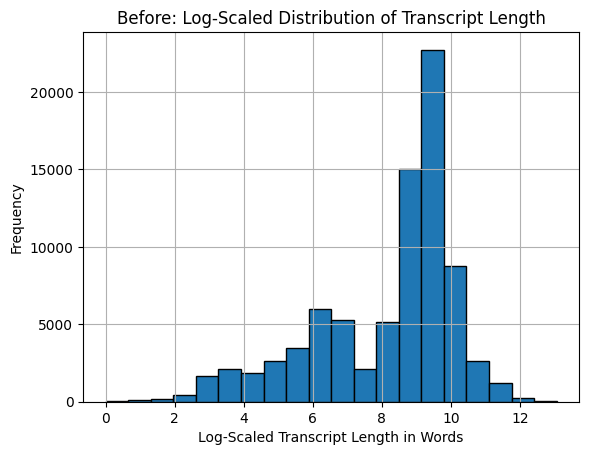

In [36]:
plt.hist(df_all['transcript_length'], bins=20, edgecolor='black')  # You can change the number of bins
plt.title('Before: Log-Scaled Distribution of Transcript Length')
plt.xlabel('Log-Scaled Transcript Length in Words')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [38]:
lower = df_all['transcript_length'].quantile(0.05)
upper = df_all['transcript_length'].quantile(0.95)

# Filter the DataFrame to remove top 5% and bottom 5%
df_filtered = df_all[(df_all['transcript_length'] >= lower) & (df_all['transcript_length'] <= upper)]
print(df_filtered.head())

      video_id                                         transcript language  \
0  2HjctXU6N5I  many of you have probably heard the saying tha...       en   
1  Yp-hUcvXnes  as we inch closer to the home stretch to seaso...       en   
2  N5-AMeWwxqg  Hey guys. We'll be reviewing a concept that we...       en   
3  -OzarB6x0q4  yasuo is one of the most loved and hated champ...       en   
4  2v3C7y5xu84  let's break down faker's best AR play of all t...       en   

  is_generated                   timestamp error_reason  transcript_length  
0         True  2025-03-26 09:59:53.366000          NaN           9.523836  
1         True  2025-03-26 10:13:41.186366          NaN           9.900383  
2        False  2025-03-26 10:13:42.011849          NaN           9.102310  
3         True  2025-03-26 10:13:42.685904          NaN           9.349493  
4         True  2025-03-26 10:13:43.372154          NaN           7.124478  


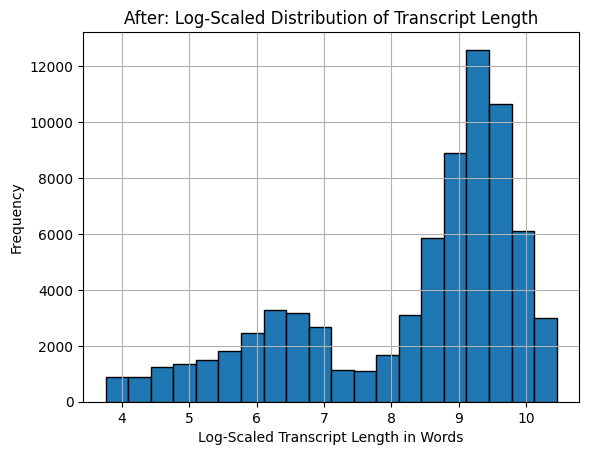

In [40]:


plt.hist(df_filtered['transcript_length'], bins=20, edgecolor='black')  # You can change the number of bins
plt.title('After: Log-Scaled Distribution of Transcript Length')
plt.xlabel('Log-Scaled Transcript Length in Words')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=395a814d-9932-4e75-96c1-b9471a984f5a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>